In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Over-sampling for handling class imbalance
from imblearn.over_sampling import SMOTE

# Hyperparameter optimization
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [5]:
data = pd.read_csv(r'data\Parkinsson disease.csv')

In [4]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
#Split Data Numeric & Categorical
data_num = data.select_dtypes(include=['number'])
data_cat = data.select_dtypes(exclude=['number'])

In [6]:
# Statistic Descriptive
desc = pd.DataFrame()
desc['Total Data Count'] = data_num.count()
desc['Nunique'] = data_num.nunique()
desc['Unique'] = data_num.nunique() / data_num.shape[0] * 100
desc['Missing Value'] = data_num.isna().sum()
desc = desc.join(data_num.describe().T.drop(columns=['count']))
desc

,Total Data Count,Nunique,Unique,Missing Value,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195,195,100.000000,0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195,195,100.000000,0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195,195,100.000000,0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195,173,88.717949,0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195,19,9.743590,0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195,155,79.487179,0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195,165,84.615385,0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195,180,92.307692,0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195,188,96.410256,0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195,149,76.410256,0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [7]:
print(f" Percentage {(data['status'].value_counts(normalize=True) * 100)}")

 Percentage status
1    75.384615
0    24.615385
Name: proportion, dtype: float64


<Axes: xlabel='status'>

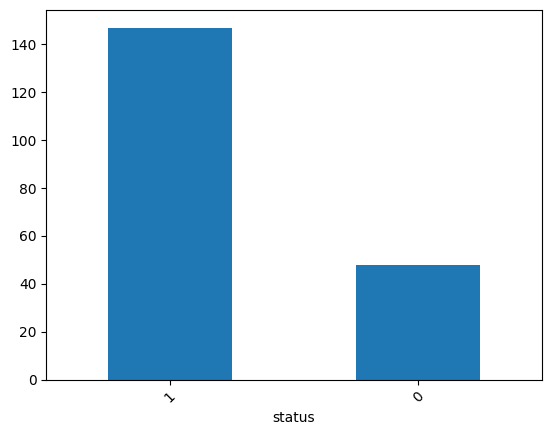

In [8]:
data['status'].value_counts().sort_values(ascending=False).plot(kind='bar', rot=45)

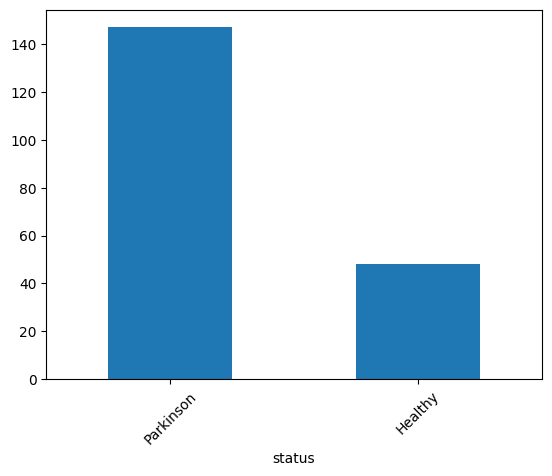

In [9]:
#Rename
status_counts = data['status'].value_counts().sort_values(ascending=False)
ax = status_counts.plot(kind='bar', rot=45)
ax.set_xticklabels(['Parkinson', 'Healthy'])
plt.show()

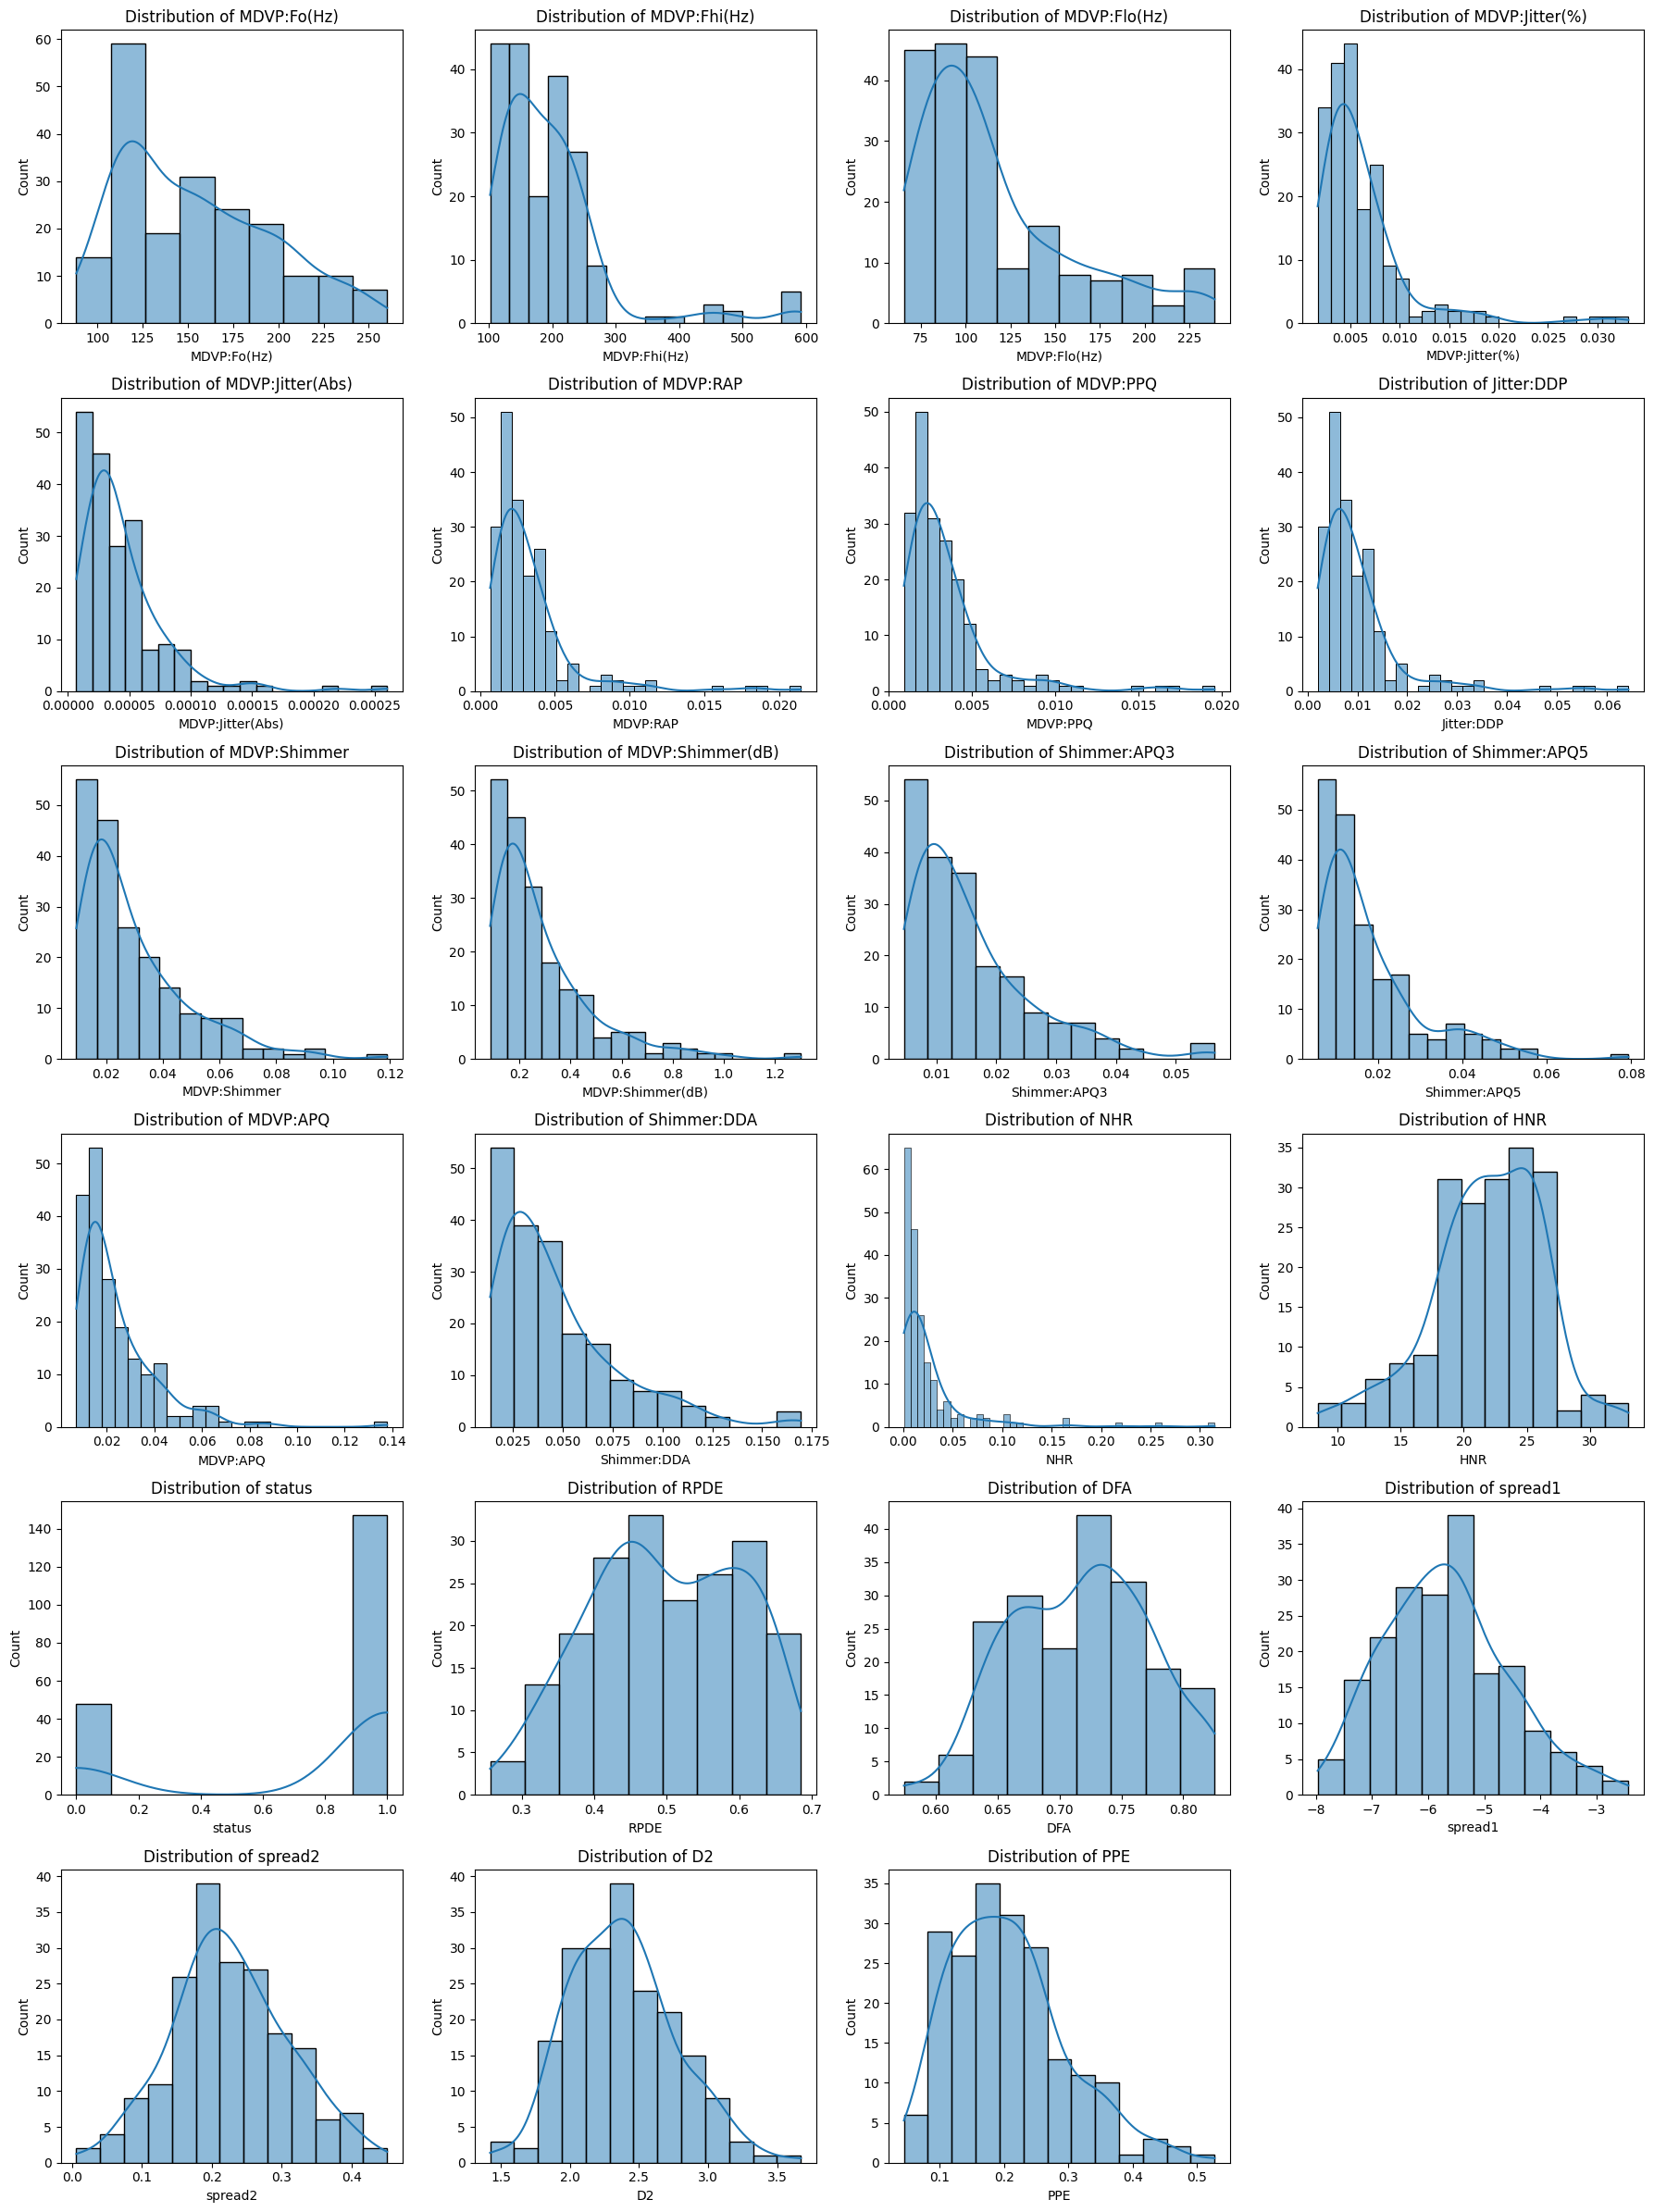

In [10]:
num_cols = data_num.columns
ncols = 4
nrows = (len(num_cols) + ncols - 1) // ncols  
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows))
axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.histplot(data=data_num, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {column}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

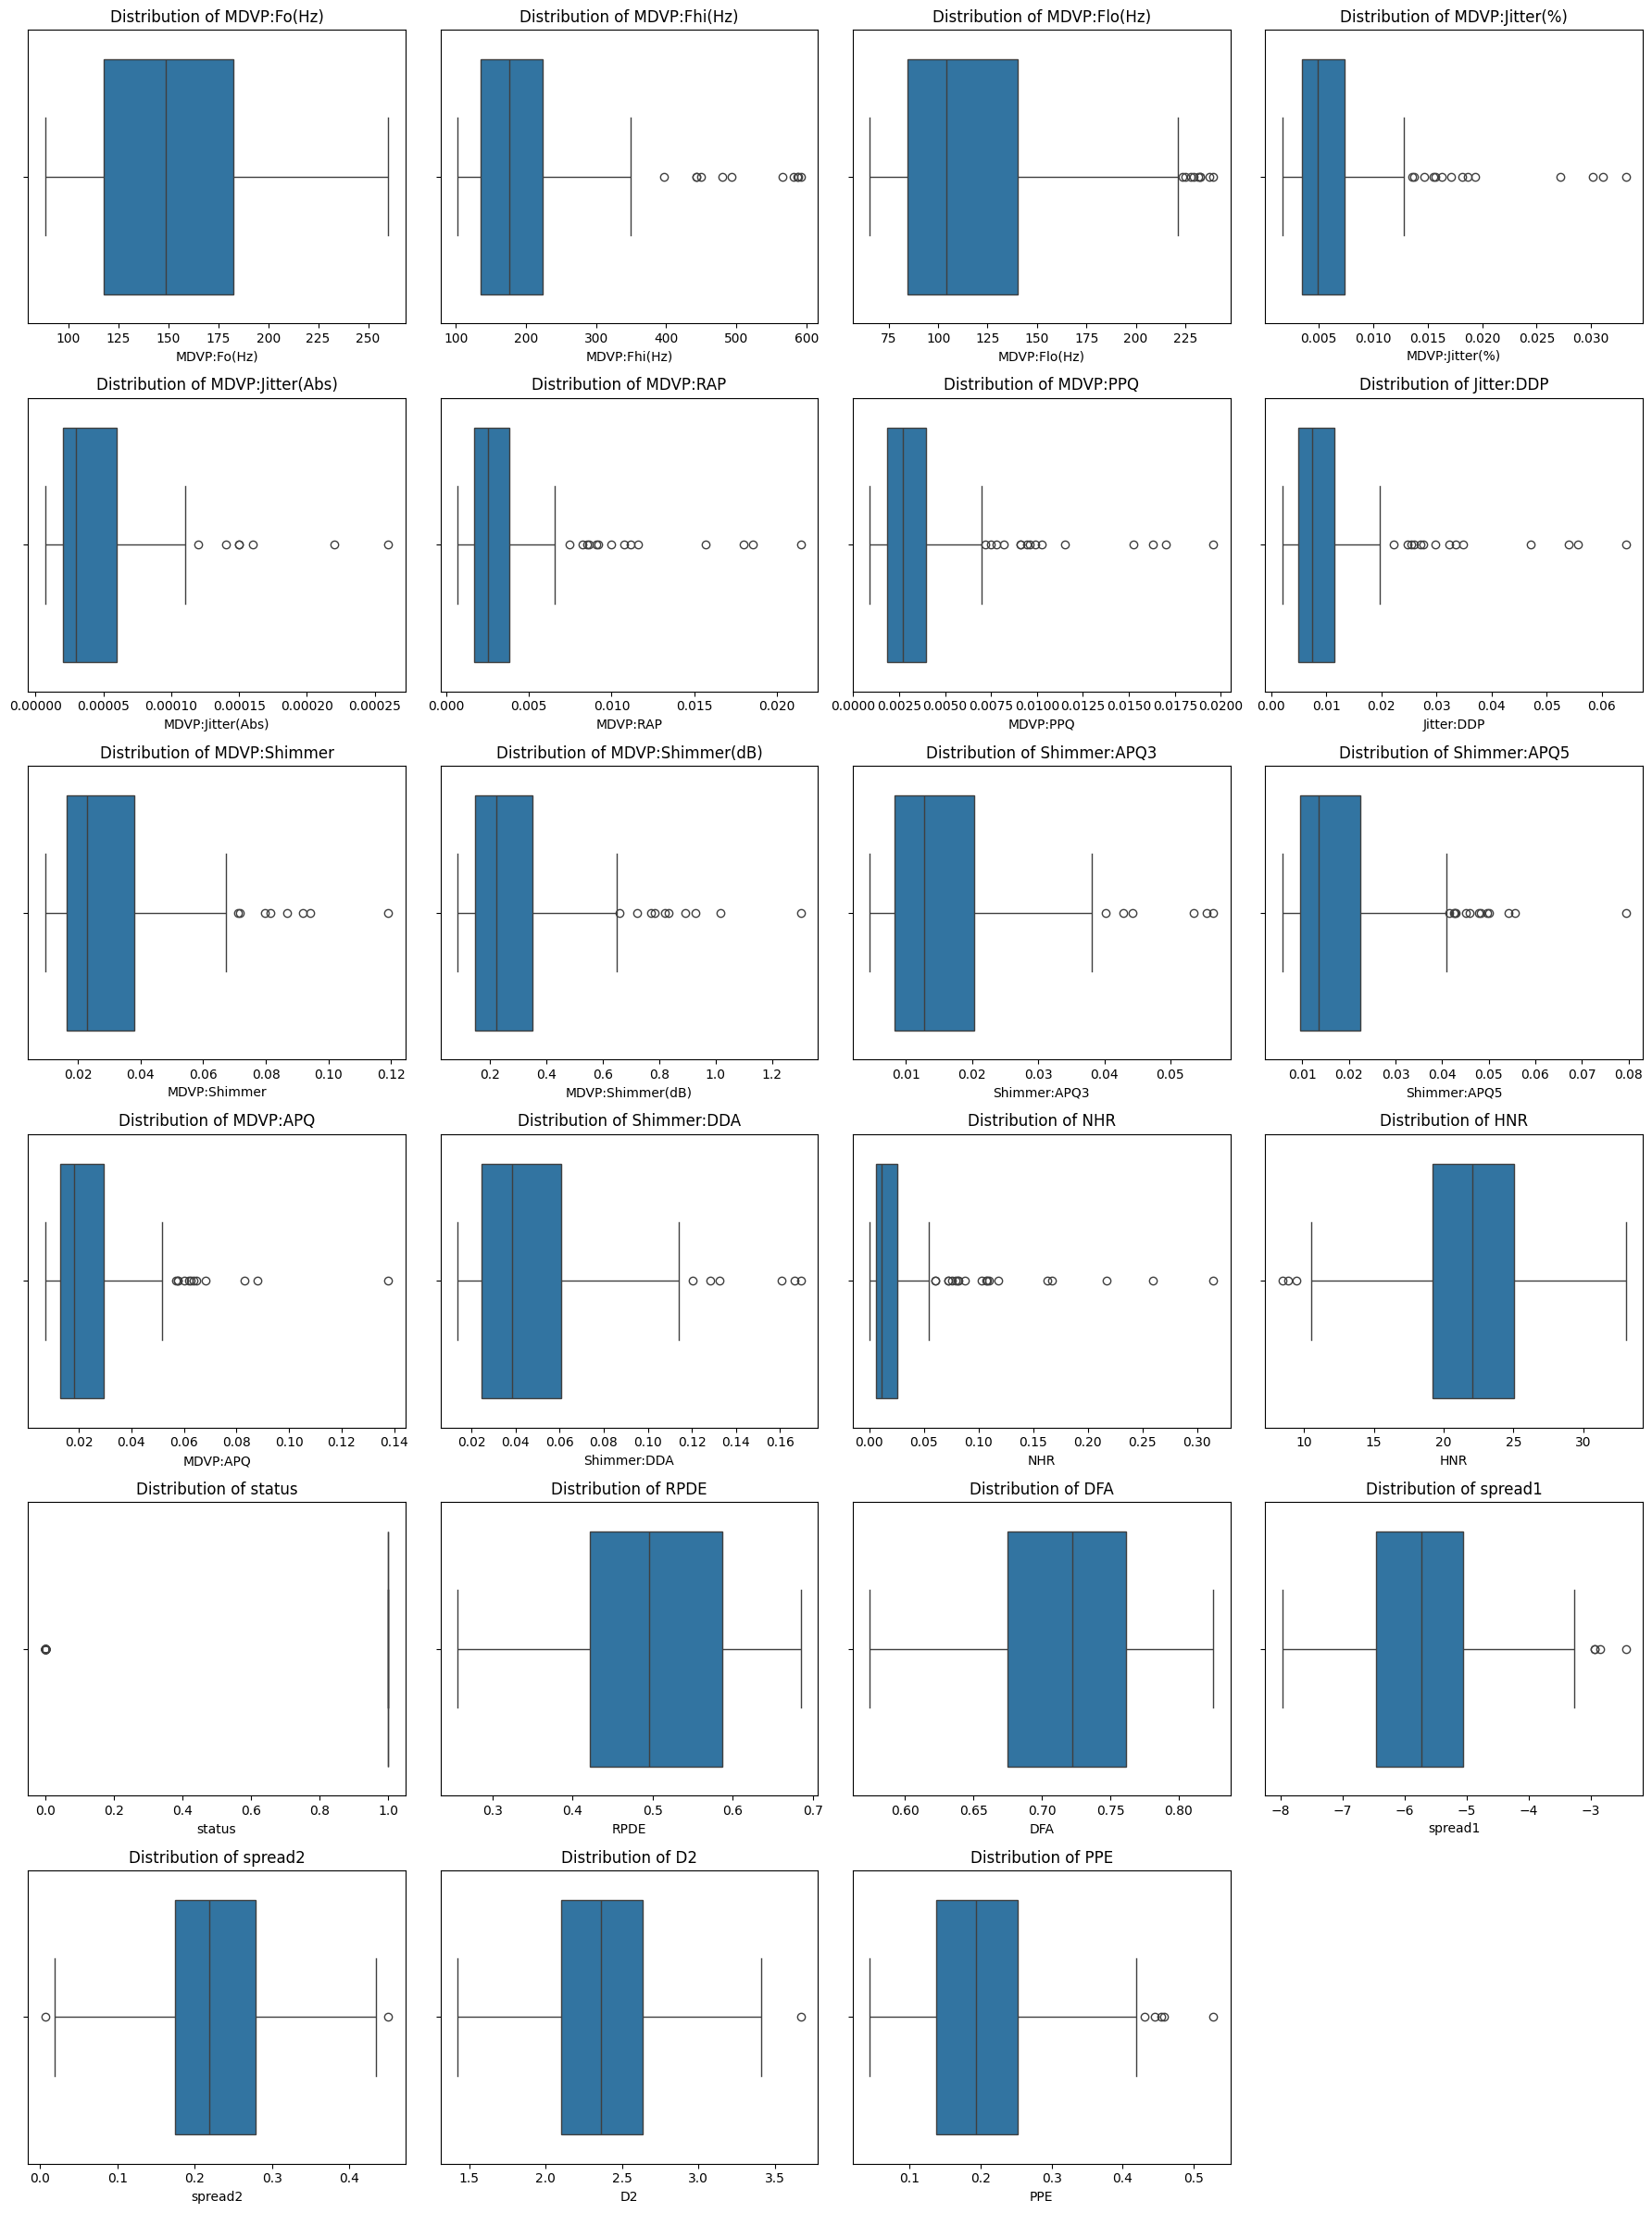

In [11]:
num_cols = data_num.columns
ncols = 4
nrows = (len(num_cols) + ncols - 1) // ncols  
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows))
axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.boxplot(data=data_num, x=column, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

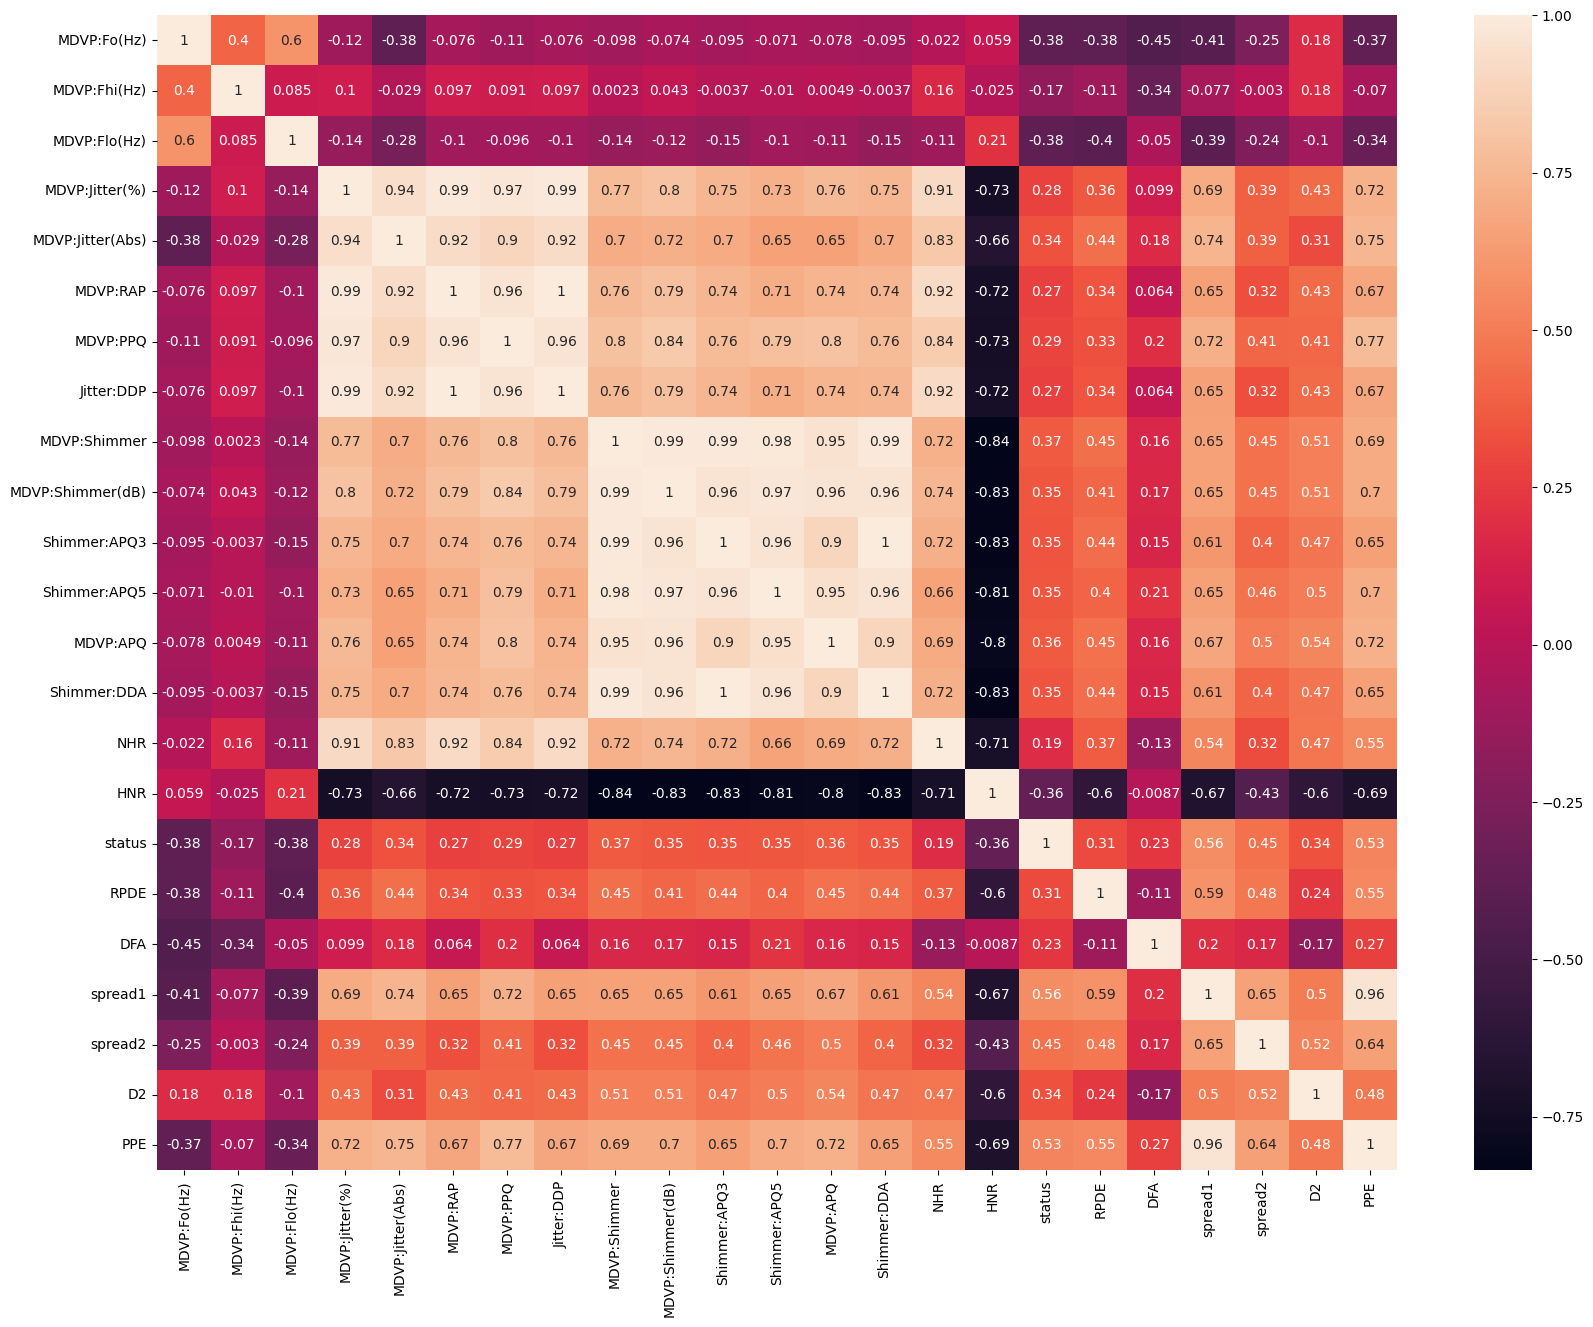

In [12]:
data_cor = data_num.corr()
plt.figure(figsize=(20,15))
sns.heatmap(data_cor, annot=True)
plt.show()

In [13]:
# Splitting
X_ = data.drop(['status', 'name'], axis=1)
y = data['status']

In [15]:
# Checking Multicollinearity
def condition_index(X):
    # scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Calculate the correlation matrix of the predictors
    corr_matrix = np.corrcoef(X_scaled, rowvar=False)
    
    # Perform Eigenvalue Decomposition on the correlation matrix
    eigenvalues, _ = np.linalg.eig(corr_matrix)
    
    # Condition Index = sqrt(max eigenvalue / each eigenvalue)
    max_eigenvalue = max(eigenvalues)
    condition_indices = np.sqrt(max_eigenvalue / eigenvalues)
    
    return condition_indices, eigenvalues

In [16]:
def drop_high_correlation_features(X, threshold=30):
    # Calculate the Condition Index and eigenvalues
    condition_indices, eigenvalues = condition_index(X)
    
    # Print the Condition Indices for reference
    print("Condition Indices:", condition_indices)
    
    # Identify features with small eigenvalues, which may indicate multicollinearity
    # We select features where the Condition Index exceeds the threshold
    problematic_features = np.where(condition_indices > threshold)[0]
    
    # If there are problematic features with CI > threshold
    if len(problematic_features) > 0:
        print(f"Features to drop (Condition Index > {threshold}): {X.columns[problematic_features]}")
        # Drop the identified problematic features from the DataFrame
        X_dropped = X.drop(X.columns[problematic_features], axis=1)
    else:
        # If no features have high CI, no features are dropped
        print(f"No features with Condition Index above {threshold}.")
        X_dropped = X
        
    return X_dropped

In [17]:
multicol_check = drop_high_correlation_features(X_)

Condition Indices: [1.00000000e+00 2.28313314e+00 2.89884150e+00 2.97408982e+00
 3.64762409e+00 4.21574945e+00 4.84400958e+00 5.97963608e+00
 6.68641112e+00 7.60369092e+00 9.60134386e+00 1.11174346e+01
 1.36313678e+01 1.84259941e+01 2.42629791e+01 2.69906237e+01
 3.22533337e+01 4.23817309e+01 6.08765307e+01 1.09286091e+02
 5.98433352e+03 1.97788255e+04]
Features to drop (Condition Index > 30): Index(['RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'], dtype='object')


In [18]:
multicol_check

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020


In [19]:
# Feature Scaling
mms = MinMaxScaler((-1,1))
X = mms.fit_transform(multicol_check)

In [20]:
X_training, X_test, y_training, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

In [21]:
#Fix Imbalance data
smote = SMOTE(k_neighbors=3, random_state=42)
X_train, y_train = smote.fit_resample(X_training, y_training)

In [22]:
y_train.value_counts()

status
0    109
1    109
Name: count, dtype: int64

In [23]:
y_test.value_counts()

status
1    38
0    11
Name: count, dtype: int64

In [24]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(probability=True),
    'XG Boost Classifier': XGBClassifier(),  
    'Random Forest': RandomForestClassifier(),  
    'Gradient Boosting': GradientBoostingClassifier(),  
}

def evaluate_models(models, X_train, y_train, n_splits=3):
    skfolds = StratifiedKFold(n_splits=n_splits)
    model_scores = {}
    model_roc_data = {}
    model_f1_scores = {}

    for model_name, model in models.items():
        print(f"Evaluating {model_name}")
        accuracy_scores = []
        auc_scores = []
        f1_scores = []

        for train_index, test_index in skfolds.split(X_train, y_train):
            clone_clf = clone(model)
            X_train_folds = X_train[train_index]
            y_train_folds = y_train.iloc[train_index]
            X_test_folds = X_train[test_index]
            y_test_folds = y_train.iloc[test_index]

            clone_clf.fit(X_train_folds, y_train_folds)
            y_pred = clone_clf.predict(X_test_folds)
            accuracy = sum(y_pred == y_test_folds) / len(y_pred)
            accuracy_scores.append(accuracy)

            # Calculate AUC
            y_pred_prob = clone_clf.predict_proba(X_test_folds)[:, 1]
            auc = roc_auc_score(y_test_folds, y_pred_prob)
            auc_scores.append(auc)

            # Calculate F1 score
            f1 = f1_score(y_test_folds, y_pred)
            f1_scores.append(f1)

        avg_accuracy = np.mean(accuracy_scores)
        model_scores[model_name] = avg_accuracy

        avg_auc = np.mean(auc_scores)
        fpr, tpr, _ = roc_curve(y_test_folds, y_pred_prob)
        model_roc_data[model_name] = (fpr, tpr)

        avg_f1 = np.mean(f1_scores)
        model_f1_scores[model_name] = avg_f1
        print(f"Average accuracy for {model_name}: {avg_accuracy:.4f}\n")
        print(f"Average AUC for {model_name}: {avg_auc:.4f}\n")
        print(f"Average F1 score for {model_name}: {avg_f1:.4f}\n")
    
    return model_scores, model_roc_data, model_f1_scores


In [25]:
model_scores, model_roc_data, model_f1_scores = evaluate_models(models, X_train, y_train)

Evaluating Logistic Regression
Average accuracy for Logistic Regression: 0.6606

Average AUC for Logistic Regression: 0.8237

Average F1 score for Logistic Regression: 0.6637

Evaluating Support Vector Classifier
Average accuracy for Support Vector Classifier: 0.7936

Average AUC for Support Vector Classifier: 0.8744

Average F1 score for Support Vector Classifier: 0.7506

Evaluating XG Boost Classifier
Average accuracy for XG Boost Classifier: 0.9451

Average AUC for XG Boost Classifier: 0.9860

Average F1 score for XG Boost Classifier: 0.9443

Evaluating Random Forest
Average accuracy for Random Forest: 0.9221

Average AUC for Random Forest: 0.9901

Average F1 score for Random Forest: 0.9210

Evaluating Gradient Boosting
Average accuracy for Gradient Boosting: 0.9360

Average AUC for Gradient Boosting: 0.9885

Average F1 score for Gradient Boosting: 0.9373



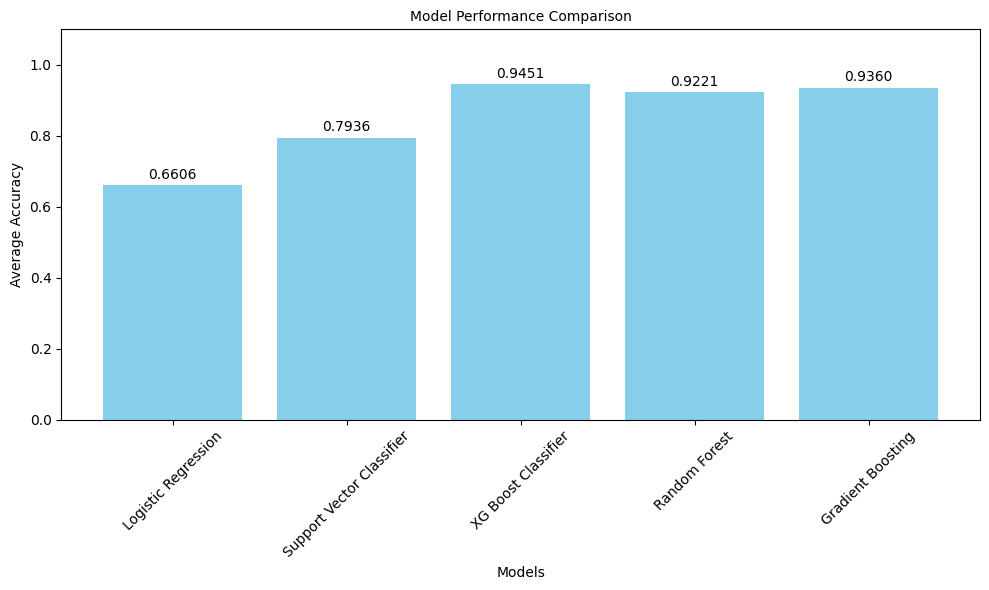

In [26]:
# Model Performance
def plot_model_clf_performance(model_scores):
    plt.figure(figsize=(10,6))
    plt.bar(model_scores.keys(), model_scores.values(), color='skyblue')
    plt.xlabel('Models', fontsize=10)
    plt.ylabel('Average Accuracy', fontsize=10)
    plt.title('Model Performance Comparison', fontsize=10)
    plt.xticks(rotation=45)
    plt.ylim(0,1.1)
    for i, v in enumerate(model_scores.values()):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
plot_model_clf_performance(model_scores)

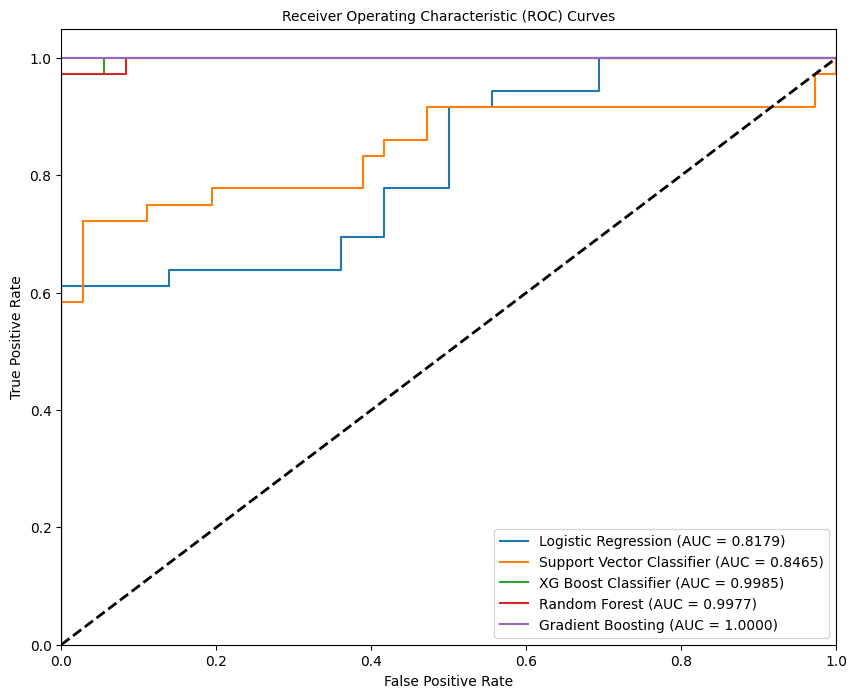

In [27]:
#ROC Curve
def plot_roc_curves(model_roc_data):
    plt.figure(figsize=(10, 8))
    for model_name, (fpr, tpr) in model_roc_data.items():
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {np.trapz(tpr, fpr):.4f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=10)
    plt.legend(loc="lower right")
    plt.show()

if model_roc_data:
    plot_roc_curves(model_roc_data)

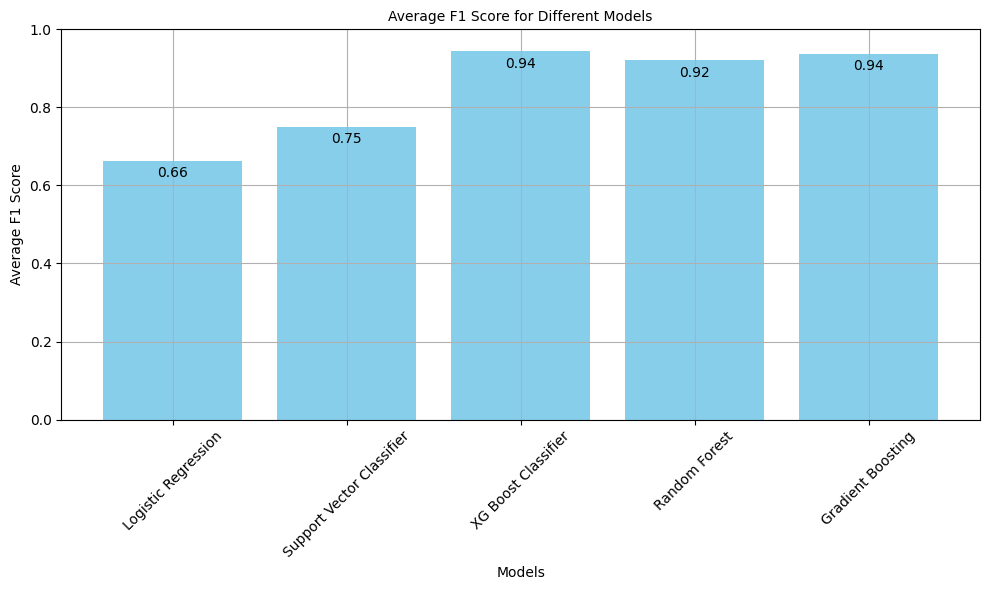

In [28]:
# Average F1 Score
model_names = list(model_f1_scores.keys())
model_f1_values = list(model_f1_scores.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, model_f1_values, color='skyblue')

plt.xlabel('Models', fontsize=10)
plt.ylabel('Average F1 Score', fontsize=10)
plt.title('Average F1 Score for Different Models', fontsize=10)
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.grid(True)

# Adding percentage annotations on top of each bar
for bar, f1_value in zip(bars, model_f1_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{f1_value:.2f}', 
             ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()

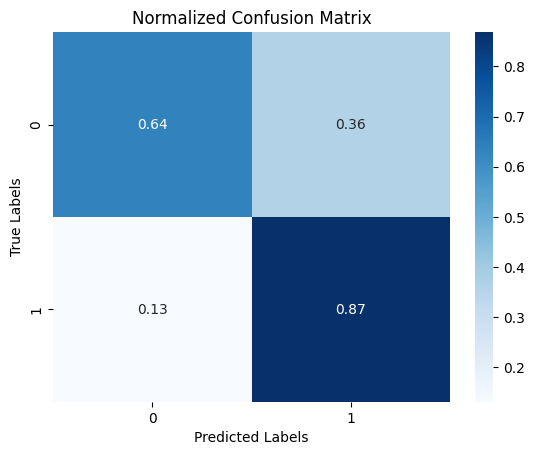

In [31]:
#Model Selection
best_model = XGBClassifier()
best_model.fit(X_train, y_train)

y_pred_test = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
cm_normalized = cm.astype('float') / cm.sum(axis=1).reshape(-1,1)  
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [38]:
# Hyperparameter Tuning

param_space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 10),  # Increased range and step size
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.5)),  # Expanded lower bound
    'max_depth': hp.quniform('max_depth', 3, 40, 1),  # Expanded maximum depth
    'min_child_weight': hp.quniform('min_child_weight', 1, 50, 1),  # Increased max value
    'subsample': hp.uniform('subsample', 0.3, 1.0),  # Reduced lower bound for more variability
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),  # Reduced lower bound
    'gamma': hp.uniform('gamma', 0, 1.0),  # Expanded range for gamma
    'reg_alpha': hp.loguniform('reg_alpha', np.log(0.0001), np.log(10)),  # Expanded upper bound for L1 regularization
    'reg_lambda': hp.loguniform('reg_lambda', np.log(0.0001), np.log(10)),  # Expanded upper bound for L2 regularization
}

# Objective function for optimization
def hyper(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_child_weight'] = int(params['min_child_weight'])
    
    model_hyper = XGBClassifier(**params, objective='binary:logistic', eval_metric='logloss', random_state=42)
    
    # Perform stratified cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Use cross-validation to evaluate the model
    hyper_scores = cross_val_score(model_hyper, X_train, y_train, cv=skf, scoring='accuracy', error_score='raise')
    return {'loss': -hyper_scores.mean(), 'status': STATUS_OK}

# Run the Hyperopt optimization
trials = Trials()
best_hyperparams = fmin(fn=hyper,
                        space=param_space,
                        max_evals=50,
                        algo=tpe.suggest,
                        trials=trials)

# Convert integer parameters back to integers
best_hyperparams['n_estimators'] = int(best_hyperparams['n_estimators'])
best_hyperparams['max_depth'] = int(best_hyperparams['max_depth'])
best_hyperparams['min_child_weight'] = int(best_hyperparams['min_child_weight'])

# Print the best parameters found
print("Best parameters found by Hyperopt:", best_hyperparams)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:18<00:00,  2.67trial/s, best loss: -0.9494714587737842]
Best parameters found by Hyperopt: {'colsample_bytree': 0.9889282036849733, 'gamma': 0.17582864691881456, 'learning_rate': 0.04998614448791899, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 320, 'reg_alpha': 0.00010680637946000199, 'reg_lambda': 0.26746182828046416, 'subsample': 0.9055262394106038}


Best parameters found by Hyperopt: {'colsample_bytree': 0.9889282036849733, 'gamma': 0.17582864691881456, 'learning_rate': 0.04998614448791899, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 320, 'reg_alpha': 0.00010680637946000199, 'reg_lambda': 0.26746182828046416, 'subsample': 0.9055262394106038}


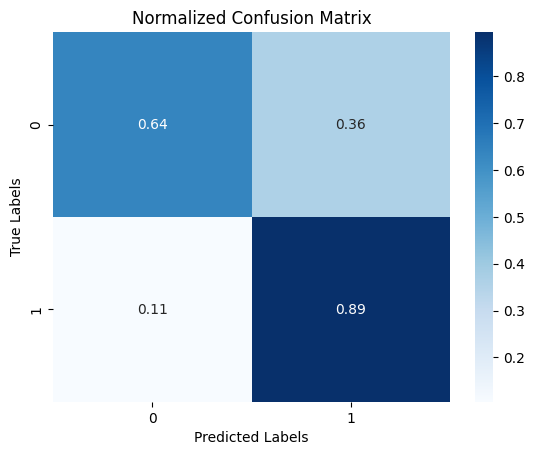

In [39]:
# Convert Hyperopt parameters to the correct types
best_hyperparams['n_estimators'] = int(best_hyperparams['n_estimators'])
best_hyperparams['max_depth'] = int(best_hyperparams['max_depth'])
best_hyperparams['min_child_weight'] = int(best_hyperparams['min_child_weight'])  

print("Best parameters found by Hyperopt:", best_hyperparams)

# Train the best XGBoost model with the optimized hyperparameters
best_model_final = XGBClassifier(**best_hyperparams, objective='binary:logistic', eval_metric='logloss', random_state=42)

best_model_final.fit(X_train, y_train)
y_pred_final = best_model_final.predict(X_test)

# Confusion matrix and visualization
cm = confusion_matrix(y_test, y_pred_final)
cm_normalized = cm.astype('float') / cm.sum(axis=1).reshape(-1, 1)

# Plotting the normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [40]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred_final)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8947
